# Project 7 with Machine Learning
## by: Aaron Pelton
## https://github.com/hrawp/datafun-07-ml


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np



##  Part 1 - Chart a Straight Line

In [69]:
# initial setup
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

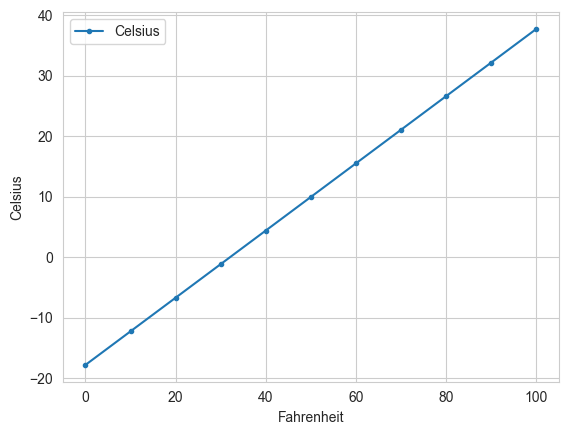

In [70]:
# creating the line
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Predict Avg High Temp in NYC in January

### Section 1 - Data Acquisition

In [71]:
# Load data
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [72]:
nyc_df.head()


,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [73]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [74]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
# Make the date only show the year.
nyc_df.Date = nyc_df.Date.floordiv(100)
# show the changes
nyc_df.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Section 4 - Descriptive Statistics

In [75]:
# Set precision to 2
pd.set_option('display.precision', 2)
# Show the description of the data
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [76]:
# Create the y = mx + b line
linear_regression = stats.linregress(x=nyc_df.Date,y=nyc_df.Temperature)
linear_regression.slope


np.float64(0.014771361132966163)

In [77]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

In [78]:
# What is the predicted temperature in 2024
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

### Section 7 - Visualizations

(10.0, 70.0)

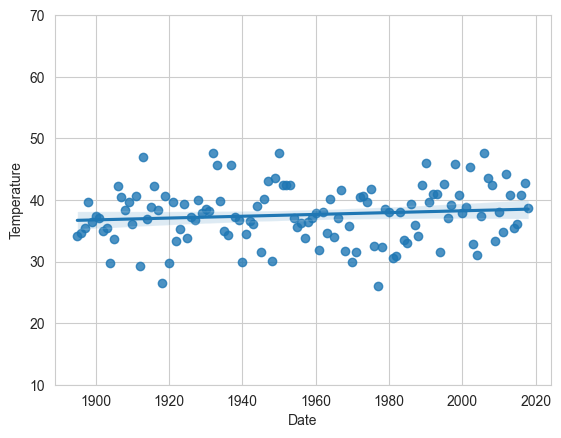

In [79]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)

## Part 3 - Prediction

### Section 1 - Build the Model

In [80]:
# Split the data in to test and training sets.
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values,
    random_state=11)


In [81]:
# Check the shape of each data set.
X_train.shape

(93, 1)

In [82]:
X_test.shape

(31, 1)

In [83]:
# Train the model using Linear Regression Fit
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [84]:
# slope
linear_regression.coef_

array([0.01939167])

In [85]:
# intercept
linear_regression.intercept_

np.float64(-0.30779820252656975)

### Section 2 - Test the Model

In [86]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


## Section 3 - Predict

In [87]:
predict = (lambda x: linear_regression.coef_ * x +
           linear_regression.intercept_)

predict(2024)

array([38.94094855])

## Section 3 - Visualizations

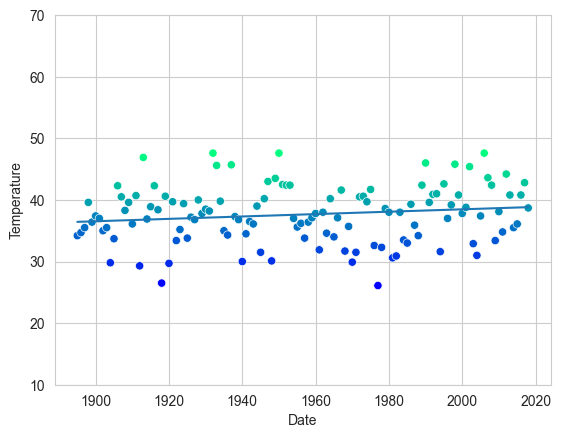

In [88]:
# Create the scatter plot
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
                       hue='Temperature', palette='winter', legend=False)
# Make the data easier to see.
axes.set_ylim(10, 70)

# Add the regression line.
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)

line = plt.plot(x, y)


## Part 4  Comparisons

I find that both models see an increase in the January average temperature over the time period.  Both models produce a similar output with Predict model yielding a slightly higher value for the temperature in 2024.

The first model gave 38.54 as the predicted average high temperature in 2024.
While the Predict model gave 38.94 for the average high temperature in 2024.

I liked how the predict model used a test and train method.  I think that gave some added value to its prediction.

The data shows a warming trend.  I wonder what it will show in 2070?